In [12]:
using Plots
using DMF
using LinearAlgebra
using FITSIO
import Healpix

data_dir = "/Users/quzhijie/QZJ/sz/data/"

"/Users/quzhijie/QZJ/sz/data/"

In [14]:
map_temp = Healpix.readMapFromFITS(data_dir * "planck_30_25arcmin_nside256.fits", 1, Float64)
I30 = Healpix.readMapFromFITS(data_dir * "planck_30_25arcmin_nside256.fits", 1, Float64)
I44 = Healpix.readMapFromFITS(data_dir * "planck_44_25arcmin_nside256.fits", 1, Float64)
I70 = Healpix.readMapFromFITS(data_dir * "planck_70_25arcmin_nside256.fits", 1, Float64)
I100 = Healpix.readMapFromFITS(data_dir * "planck_100_25arcmin_nside256.fits", 1, Float64)
I143 = Healpix.readMapFromFITS(data_dir * "planck_143_25arcmin_nside256.fits", 1, Float64)
I217 = Healpix.readMapFromFITS(data_dir * "planck_217_25arcmin_nside256.fits", 1, Float64)
I353 = Healpix.readMapFromFITS(data_dir * "planck_353_25arcmin_nside256.fits", 1, Float64)
I545 = Healpix.readMapFromFITS(data_dir * "planck_545_25arcmin_nside256.fits", 1, Float64)
mask = Healpix.readMapFromFITS(data_dir * "HI50_dust50_pccs_mask.fits", 1, Float64)
mask_good = (mask.pixels .== 0);

In [16]:
mI30 = I30.pixels[mask_good]
mI44 = I44.pixels[mask_good]
mI70 = I70.pixels[mask_good]
mI100 = I100.pixels[mask_good]
mI143 = I143.pixels[mask_good]
mI217 = I217.pixels[mask_good]
mI353 = I353.pixels[mask_good]
mI545 = I545.pixels[mask_good];

In [18]:
X = [mI30 mI44 mI70 mI100 mI143 mI217 mI353 mI545]'

8×242586 Adjoint{Float64,Array{Float64,2}}:
 -6.04747e-5   -6.8953e-5    -5.85037e-5   …  1.15138e-5   2.1742e-5  
 -7.1704e-5    -7.59517e-5   -6.53152e-5      2.33211e-5   3.13501e-5 
 -7.15135e-5   -7.70748e-5   -6.34874e-5      2.8712e-5    3.67507e-5 
 -8.30706e-5   -8.73585e-5   -7.29573e-5      2.29271e-5   3.04657e-5 
 -6.91801e-5   -7.42088e-5   -5.99366e-5      3.38303e-5   4.14352e-5 
 -5.39777e-6   -1.07476e-5    3.09225e-6   …  9.13064e-5   9.8993e-5  
  0.000465326   0.000458561   0.000477659     0.000561818  0.000572004
  0.467224      0.468544      0.474418        0.485651     0.486252   

In [19]:
k = 5
w, Q_hat, C_hat, A_hat = dmf(X; C_nsv = k, lag = 1)

([0.9994987038752755, 0.9807805323468032, 0.9570411928073173, 0.9410517133494224, 0.9004039939695897, 0.8788065217849886, 0.8419611990850021, 0.7943825366891423], [-5.336475645305955e-5 -6.900262368462493e-5 … -0.0011212044616762376 8.127281261056569e-5; -3.661867200771382e-5 3.415582250192525e-5 … -0.0005727386344461956 0.003885196334356772; … ; -0.0010981675888108169 -0.000865192604564424 … -0.0019008312826342714 -0.0006406492970158764; -0.999999379043613 -0.9999996187008442 … -0.9999959831284331 -0.9999915853740042], [-0.6939463152674233 0.19966968133583762 … 0.03379170155292163 -0.019241727816701623; -0.6765695987132877 0.18651556945379416 … 0.026592838500434635 -0.01933899839887499; … ; -0.5622626071611899 0.11542677084858213 … -0.0055582586421036055 0.0011216305593417073; -0.5709661843527406 0.1211551647675464 … 0.00027172843036507577 0.0018888395678970324], [0.9239488452275607 0.06287826310447425 … -0.015151073992198052 1.7678182115376425e-5; 0.014775485139894063 0.8498087428125

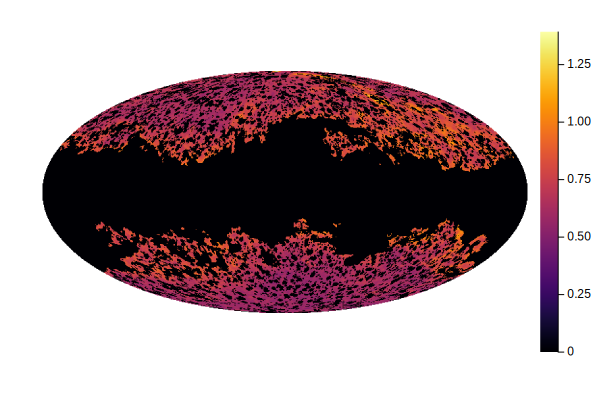

In [20]:
map_temp.pixels[.!mask_good] .= 0
map_temp.pixels[mask_good] .= -C_hat[:, 1]
plot(map_temp)

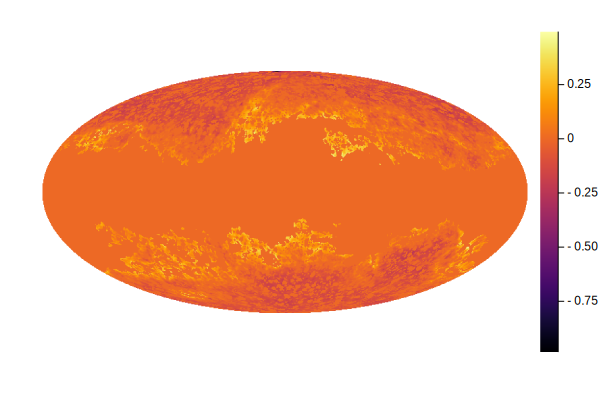

In [21]:
map_temp.pixels[mask_good] .= -C_hat[:, 2]
plot(map_temp)

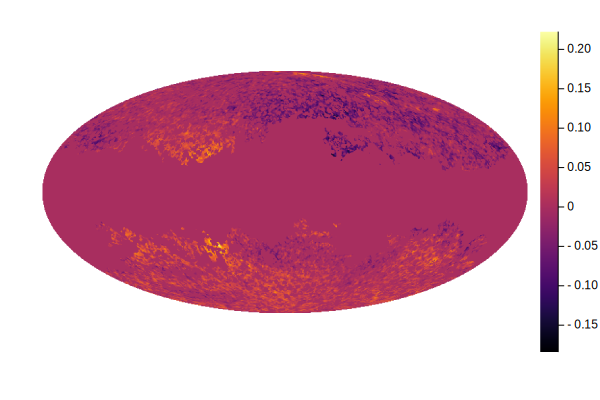

In [22]:
map_temp.pixels[mask_good] .= -C_hat[:, 3]
plot(map_temp)

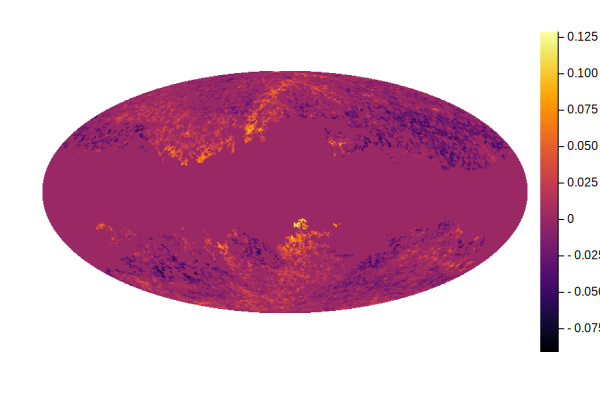

In [23]:
map_temp.pixels[mask_good] .= C_hat[:, 4]
plot(map_temp)

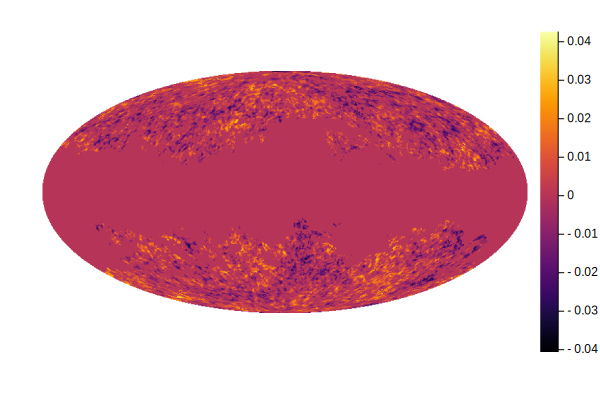

In [24]:
map_temp.pixels[mask_good] .= C_hat[:, 5]
plot(map_temp)